# EDA

In [9]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import user-defined functions
from data.load import load_data

In [10]:
df = load_data(preprocessed=True)

In [13]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,1.0,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,1,2.0,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,0,2.0,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,0,0.0,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,0,1.0,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0


### Attrition distribution

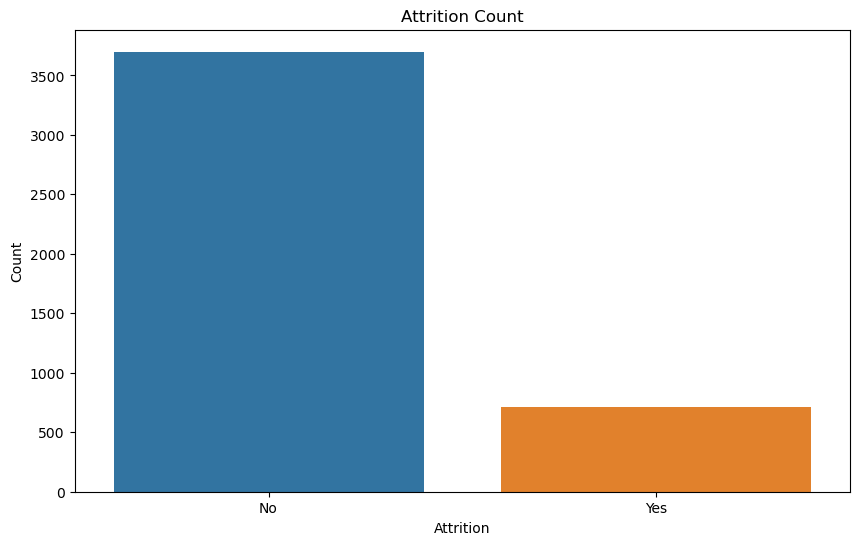

In [24]:
plt.subplots(figsize=(10, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### Employee survey questions distribution

<Axes: xlabel='JobSatisfaction', ylabel='count'>

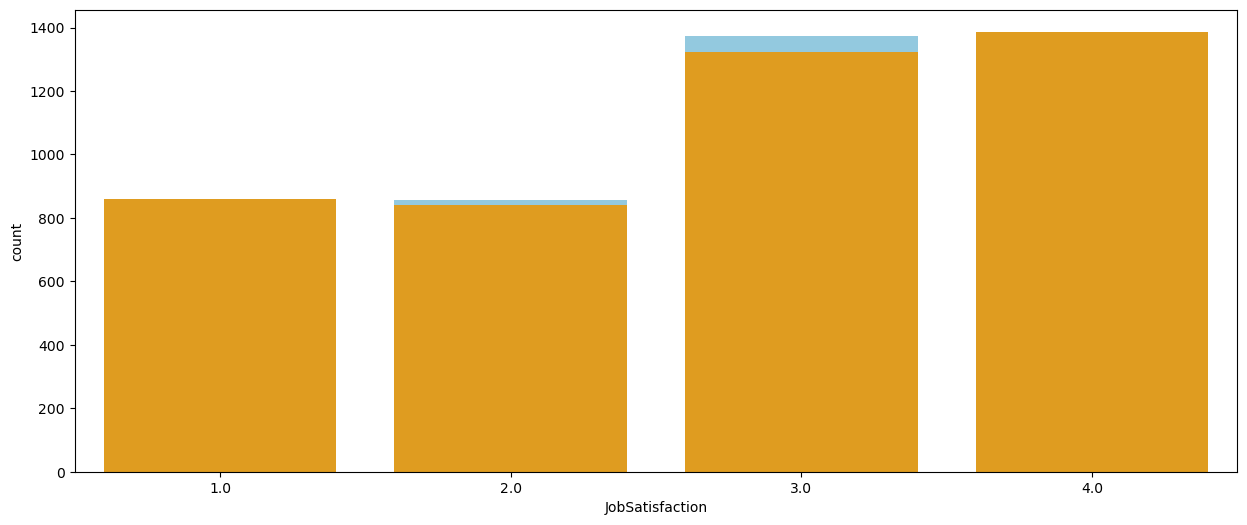

In [39]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data=df, x='EnvironmentSatisfaction', fill=True, color='skyblue', ax=ax)
sns.countplot(data=df, x='JobSatisfaction', fill=True, color='orange', ax=ax)


/opt/anaconda3/envs/env-canonical/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/env-canonical/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/env-canonical/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


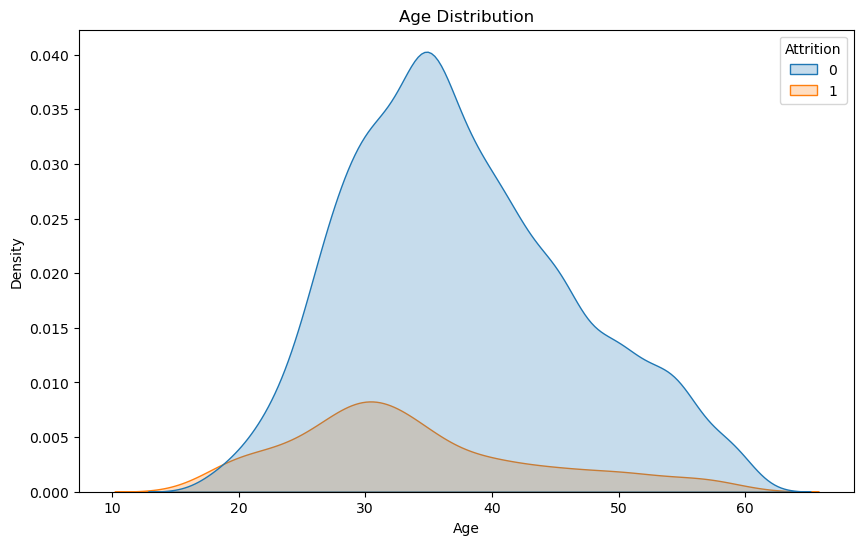

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(df, x='Age', hue='Attrition', fill=True, ax=ax)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()